In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

brutos = '../Datos/Brutos/'
pd.set_option('display.max_columns', None) 

**Estaciones meteorológicas utilizadas**

Se buscaron las estaciones que quedaran más cerca de los incendios registrados en cada región. No tenemos como obtener las condiciones exactas de cada foco, por lo que se utilizó la siguiente información como proxy:
+ Valparaiso: Estación Rodelillo.
+ Metropolitana: Estación El Paico.
+ Biobio: Estación Chillán y El Huertón.
+ Araucanía: Estación El Huertón (Esta estación está fuera de la región pero es la más cercana a los principales focos de incendio).

In [2]:
def leer(zona,metrica):
    files=glob.glob(os.path.join(brutos + '/Meteorologicos/{}/3?0???_201???_{}.csv'.format(zona,metrica)))
    df = pd.DataFrame()
    list_=[]

    for file_ in files:
        temp = pd.read_csv(file_,index_col=None, header=0, delimiter=";") 
        list_.append(temp)
    df = pd.concat(list_)
    return df

In [3]:
zonas ={'valp':'Valparaiso','met':'Santiago','arau':'Araucania','bio':'Bio Bio'}
for zona in ['valp','met','arau','bio']:
    globals()['%s_temp'% zona] = leer(zonas[zona],'Temperatura')[['momento','ts']] 
    globals()['%s_temp'% zona].columns=['momento','Temperatura superficie']

for zona in ['valp','met','arau','bio']:
    globals()['%s_viento'% zona] = leer(zonas[zona],'Viento')[['momento', 'ffInst','ddInst']]
    globals()['%s_viento'% zona].columns=['momento','Intensidad viento','Dirección Viento']

for zona in ['valp','met','arau','bio']:
    globals()['%s_hum'% zona] = leer(zonas[zona],'PresionHumedad')[['momento','hr']]
    globals()['%s_hum'% zona].columns=["momento", "Humedad (%)"]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


In [58]:
df_valp=pd.merge(valp_temp, valp_hum, how="inner", left_on="momento", right_on="momento")
df_valp=df_valp.merge(valp_viento, how="left", on="momento")

df_met=pd.merge(met_temp, met_hum, how="inner", left_on="momento", right_on="momento")
df_met=df_met.merge(met_viento, how="left", on="momento")

df_arau=pd.merge(arau_temp, arau_hum, how="inner", left_on="momento", right_on="momento")
df_arau=df_arau.merge(arau_viento, how="left", on="momento")

df_bio=pd.merge(bio_temp, bio_hum, how="inner", left_on="momento", right_on="momento")
df_bio=df_bio.merge(bio_viento, how="left", on="momento")

In [60]:
for zona in ['valp','met','arau','bio']:
    globals()['df_%s'% zona]['momento']=pd.to_datetime(globals()['df_%s'% zona]['momento'],format='%Y-%m-%d %H:%M:%S')
    globals()['df_%s'% zona]['Zona']=zonas[zona]

In [61]:
#Resamplear

for zona in ['valp','met','arau','bio']:
    globals()['df_%s'% zona].set_index('momento',inplace=True)
    globals()['df_res_%s'% zona]=pd.DataFrame()
    variables=["Temperatura superficie","Humedad (%)","Intensidad viento", 'Dirección Viento']
    for col in variables:
        globals()['df_res_%s'% zona][col]=globals()['df_%s'% zona][col].resample('D',how='mean')
    globals()['df_res_%s'% zona]['T°Max']=globals()['df_%s'% zona]['Temperatura superficie'].resample('D',how='max')
    globals()['df_res_%s'% zona]['H°Min']=globals()['df_%s'% zona]['Humedad (%)'].resample('D',how='min')
    globals()['df_res_%s'% zona]['V°Max']=globals()['df_%s'% zona]['Intensidad viento'].resample('D',how='max')
    globals()['df_res_%s'% zona]['Zona']=globals()['df_%s'% zona]['Zona'].resample('D',how='first')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  if sys.path[0] == '':


In [66]:
df_met.reset_index()

,momento,Temperatura superficie,Humedad (%),Intensidad viento,Dirección Viento,Zona
0,2018-07-01 00:00:00,9.8,90.6,1.9,78.8,Santiago
1,2018-07-01 00:00:00,9.8,90.6,1.9,78.8,Santiago
2,2018-07-01 00:00:00,9.8,90.6,1.9,78.8,Santiago
3,2018-07-01 00:00:00,9.8,90.6,1.9,78.8,Santiago
4,2018-07-01 00:00:00,9.8,90.6,1.9,78.8,Santiago
5,2018-07-01 00:00:00,9.8,90.6,1.9,78.8,Santiago
6,2018-07-01 00:00:00,9.8,90.6,1.9,78.8,Santiago
7,2018-07-01 00:00:00,9.8,90.6,1.9,78.8,Santiago
8,2018-07-01 00:01:00,9.7,90.6,1.8,94.2,Santiago
9,2018-07-01 00:02:00,9.7,90.6,0.9,88.4,Santiago


# Incendios

In [86]:
incendios = pd.read_excel(brutos+'Incendios/Incendios magnitud.xlsx')
incendios['Región'].replace(to_replace='Metropolitana',value='Santiago',inplace=True)
incendios['Región'].replace(to_replace='Valparaíso',value='Valparaiso',inplace=True)
incendios['Región'].replace(to_replace='Araucanía',value='Araucania',inplace=True)
incendios['Región'].replace(to_replace='Biobio',value='Bio Bio',inplace=True)
incendios.reset_index(inplace=True)
incendios['Duración']=incendios.apply(lambda x: (x['Fecha término']-x['Fecha inicio']).days,axis=1)

In [87]:
incendios['Fecha término'].max()

Timestamp('2018-03-23 00:00:00')

In [88]:
incendios['Fecha_hora'] = pd.to_datetime(incendios['Fecha inicio'].astype(str) 
                                         + ' ' + incendios['Hora inicio'].astype(str))

In [89]:
incendios2 =incendios.copy()
incendios2.drop(columns='index',inplace=True)


In [90]:
df2 = pd.melt(incendios[['index','Fecha inicio','Fecha término']], id_vars='index', value_name='Fecha')
df2.Fecha = pd.to_datetime(df2.Fecha)
df2.set_index('Fecha', inplace=True)
df2.drop('variable', axis=1, inplace=True)

In [91]:
df3 = df2.groupby('index').resample('D').ffill().reset_index(level=0, drop=True).reset_index()

In [92]:
incendios = incendios.merge(df3,how='outer',on='index')

# Consolidación

Dataframe `incendios`: Contiene la información diaria y la ocurrencia de incendios cada día. Hay una variable que cuenta la cantida de incendios simultáneos.

Dataframe `incendios2`: Contiene la información sobre los incendios (no diaria). Hectáreas quemadas, zona, duración del incendio, entre otras.

In [165]:
#Incendios
met = df_res_met.reset_index().merge(incendios,how='left',left_on=['momento','Zona'],right_on=['Fecha','Región'])
valp = df_res_valp.reset_index().merge(incendios,how='left',left_on=['momento','Zona'],right_on=['Fecha','Región'])
arauco = df_res_arau.reset_index().merge(incendios,how='left',left_on=['momento','Zona'],right_on=['Fecha','Región'])
biobio = df_res_bio.reset_index().merge(incendios,how='left',left_on=['momento','Zona'],right_on=['Fecha','Región'])

In [174]:
print(len(etl(met2,dic2,grouped=False)),len(etl(met,dic1)))


450 447


In [97]:
def merge_base(region,base_tem):
    base = incendios2.loc[incendios2['Región']==region].merge(base_tem.reset_index(),how='left',left_on=['Región','Fecha_hora'],
                 right_on=['Zona','momento']).dropna()
    return base

incendios3 = merge_base('Santiago',df_met).append(merge_base('Valparaiso',df_valp)).append(
    merge_base('Araucania',df_arau)).append(merge_base('Bio Bio',df_bio)).reset_index(drop=True)

In [157]:
#Incendios2
def filled_data(base_resample):
    base = base_resample.reset_index().merge(incendios3,how='left',left_on=['momento','Zona'],
                                      right_on=['Fecha inicio','Región'])
    base.drop(columns = ['Temperatura superficie_x', 'Humedad (%)_x','Intensidad viento_x', 'Dirección Viento_x',
                         'Región','Provincia','Comuna','Hora inicio','Fecha_hora','momento_y','Zona_y'],inplace=True)
    base.rename(columns=({'momento_x':'momento','Temperatura superficie_y':'Temperatura superficie', 
                          'Humedad (%)_y':'Humedad (%)','Intensidad viento_y':'Intensidad viento', 
                          'Dirección Viento_y':'Dirección Viento','Zona_x':'Zona'}),inplace=True)
    return base
met2 = filled_data(df_res_met)
valp2 = filled_data(df_res_valp)
arau2 = filled_data(df_res_arau)
biobio2 = filled_data(df_res_bio)

In [159]:
dic1 = {'Temperatura superficie':'mean','Humedad (%)':'mean','Intensidad viento':'mean','Dirección Viento':'mean', 
 'T°Max':'mean','H°Min':'mean','V°Max':'mean','index':'count','Fecha inicio':'first','Fecha término':'max',
 'Incendio':'first','Zona':'first'}
dic2 = ['momento','Temperatura superficie','Humedad (%)','Intensidad viento','Dirección Viento', 
 'T°Max','H°Min','V°Max','Fecha inicio','Fecha término','Incendio','Ha quemadas','Duración','Zona']


In [160]:
def etl(base,dic, grouped=True):
    base.loc[~base['Duración'].isnull(),'Incendio']=1
    #met['Incendio']=met['Incendio'].replace(to_replace=np.nan,value=0)
    base=base.loc[base['momento']<'2018-03-24']
    if grouped ==True:
        base = base.groupby('momento').agg(dic)
        base.rename(columns={'index':'N° Incendios simultáneos'},inplace=True)
        base['N° Incendios simultáneos'] = base.apply(lambda x: 0 if x['Incendio']!=1 
                                                  else x['N° Incendios simultáneos'],axis=1)
        base.reset_index(inplace=True)
    else: 
        base = base[dic]
    base.drop(columns=['Fecha inicio','Fecha término'],inplace=True)
    
    return base

In [100]:
def plot_fire(base,region):
    sample=etl(base,dic1)
    fecha = sample.momento.tolist()
    temp = sample['T°Max'].tolist()
    inc = sample['Incendio']*sample['T°Max'].tolist()

    plt.figure(figsize=(20,5))
    plt.plot(fecha, temp, '-', fecha, inc, 'o')
    plt.xlabel('Fecha', fontsize=18)
    plt.ylabel('Temperatura', fontsize=18)
    plt.title('Evolución temperatura máxima y ocurrencia de incendios, Región {}'.format(region), fontsize=18)
    plt.legend(['Temperatura', 'Incendio'], loc=4, frameon=False, fontsize=14)

def plot_scatter(base,v1,v2,ax):
    sample=base
    sample=etl(base,dic1)
    #sample = sample.loc[sample['N° Incendios simultáneos']>0]
    #sample = sample.loc[sample['Incendio']==1]
    sample.plot.scatter(v1, v2, c='N° Incendios simultáneos', colormap='cool', sharex=False,fontsize=14,ax=ax,s)
    plt.xlim(5,40)


In [360]:
def plot_region(region,title):
    fig =plt.figure(figsize=(15,5))
    fig.suptitle(title, fontsize=18)
    ax1 = fig.add_subplot(121)
    plot_scatter(region,'T°Max','V°Max',ax1)
    ax1.set_title("Viento-Temperatura y cantidad de incendios",fontsize=12)
    ax1.set_ylabel('Viento (Km/h)',fontsize=12)
    ax1.set_xlabel('Temperatura (°C)',fontsize=12)
    
    plt.ylim(0, 30)
    
    ax2 = fig.add_subplot(122)
    plot_scatter(region,'T°Max','H°Min',ax2)
    ax2.set_title("Humedad-Temperatura y cantidad de incendios",fontsize=12)
    ax2.set_ylabel('Humedad relativa (%)',fontsize=12)
    ax2.set_xlabel('Temperatura (°C)',fontsize=12)
    plt.ylim(0, 105)


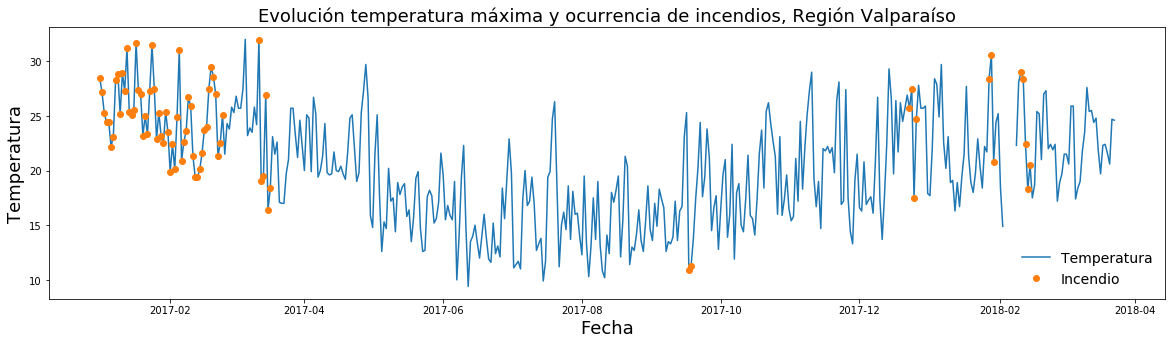

In [104]:
plot_fire(valp,'Valparaíso')

In [181]:
# Datos totales
df = etl(met,dic1).append(etl(valp,dic1)).append(etl(arauco,dic1)).append(etl(biobio,dic1)).reset_index(drop=True)
df2 = etl(met2,dic2,grouped=False).append(etl(valp2,dic2,grouped=False)
                                         ).append(etl(arau2,dic2,grouped=False)).append(etl(biobio2,dic2,grouped=False
                                                                                           )).reset_index(drop=True)

In [280]:
for i,j in zip(['Temperatura superficie','Humedad (%)','Intensidad viento'],['T°Max','H°Min','V°Max']):
    df2[i] = df2.apply(lambda x: x[j] if x['Incendio']==0
               else x[i],axis=1)


In [287]:
for v in ['Incendio','Ha quemadas', 'Duración','Dirección Viento']:
    df2[v].replace(to_replace=np.nan, value=0,inplace=True)
df['Incendio'].replace(to_replace=np.nan, value=0,inplace=True)

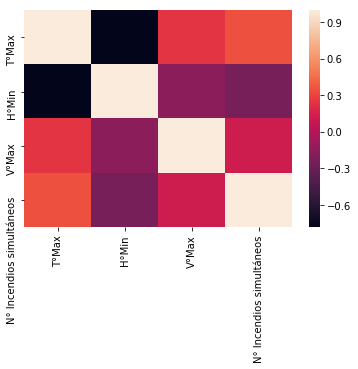

In [288]:
corr = df[['T°Max','H°Min','V°Max','N° Incendios simultáneos']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [289]:
corr

,T°Max,H°Min,V°Max,N° Incendios simultáneos
T°Max,1.000000,-0.785908,0.241961,0.344702
H°Min,-0.785908,1.000000,-0.152990,-0.244531
V°Max,0.241961,-0.152990,1.000000,0.118569
N° Incendios simultáneos,0.344702,-0.244531,0.118569,1.000000


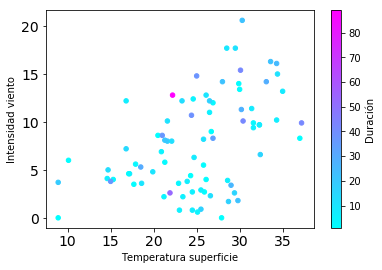

In [197]:
df2.loc[df2['Incendio']==1].plot.scatter('Temperatura superficie',
                                         'Intensidad viento',c='Duración',colormap='cool', sharex=False,fontsize=14)

In [86]:
#incendios.groupby(['Región','index']).agg({'index':'count'})

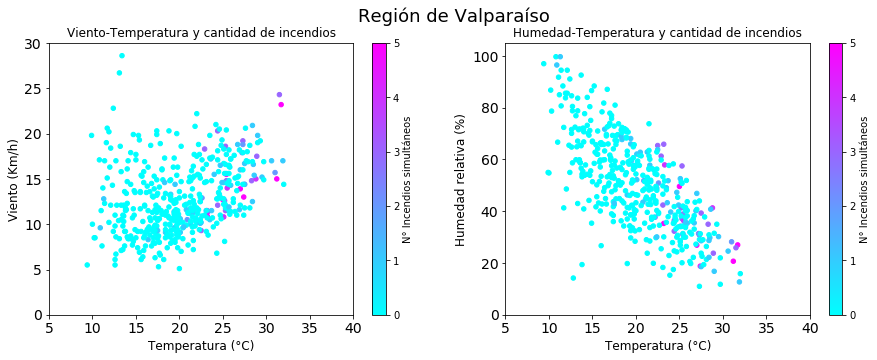

In [361]:
plot_region(valp,'Región de Valparaíso')

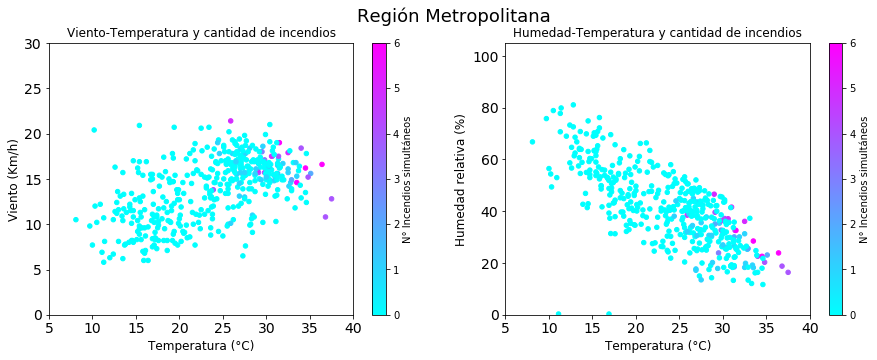

In [362]:
plot_region(met,'Región Metropolitana')

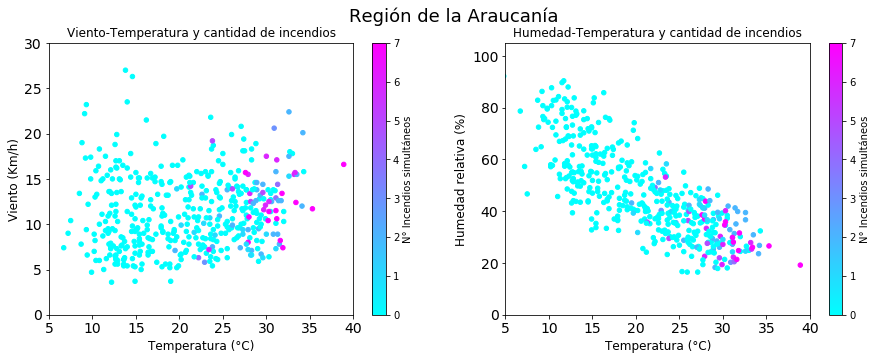

In [363]:
plot_region(arauco,'Región de la Araucanía')

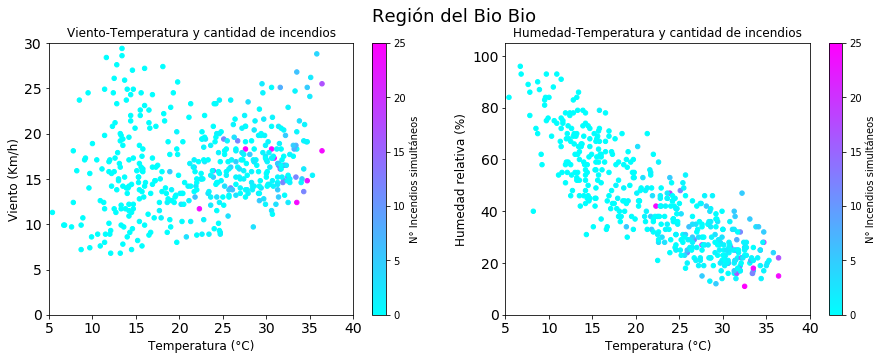

In [364]:
plot_region(biobio,'Región del Bio Bio')

In [202]:
%matplotlib inline

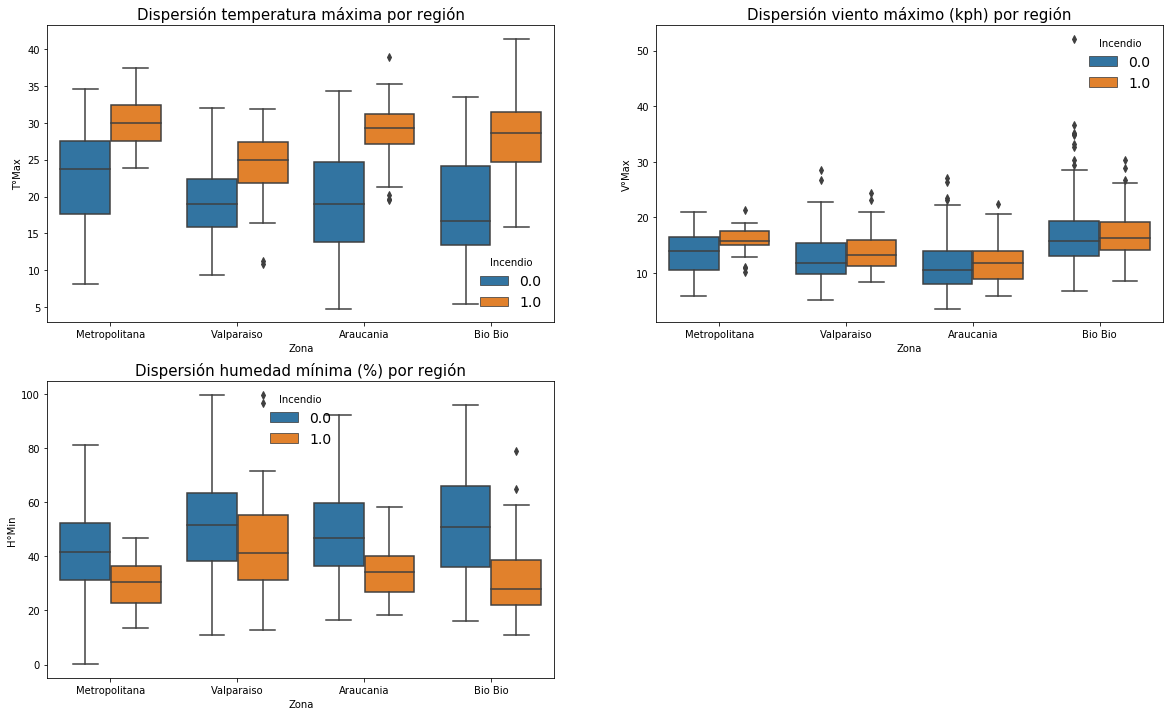

In [369]:
df.replace(to_replace='Santiago',value='Metropolitana',inplace=True)
fig =plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(221)
sns.catplot(x='Zona',y='T°Max',kind='box',data=df,hue='Incendio',ax=ax1)
ax1.set_title("Dispersión temperatura máxima por región",fontsize=15)
ax1.legend(title='Incendio',frameon=False,fontsize=14)

ax2 = fig.add_subplot(222)
sns.catplot(x='Zona',y='V°Max',kind='box',data=df,hue='Incendio',ax=ax2)
ax2.set_title("Dispersión viento máximo (kph) por región",fontsize=15)
ax2.legend(title='Incendio',frameon=False,fontsize=14)

ax3 = fig.add_subplot(223)
sns.catplot(x='Zona',y='H°Min',kind='box',data=df,hue='Incendio',ax=ax3)
ax3.set_title("Dispersión humedad mínima (%) por región",fontsize=15)
ax3.legend(title='Incendio',frameon=False,fontsize=14)

plt.close(2)
plt.close(3)
plt.close(4)

# Machine learning

In [216]:
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold

In [246]:
df2

,momento,Temperatura superficie,Humedad (%),Intensidad viento,Dirección Viento,T°Max,H°Min,V°Max,Incendio,Ha quemadas,Duración,Zona
0,2017-01-01,NaN,NaN,NaN,NaN,32.0,26.7,14.9,0.0,0.00,0.0,Santiago
1,2017-01-02,NaN,NaN,NaN,NaN,30.7,27.4,17.5,0.0,0.00,0.0,Santiago
2,2017-01-03,NaN,NaN,NaN,NaN,30.6,22.9,16.0,0.0,0.00,0.0,Santiago
3,2017-01-04,NaN,NaN,NaN,NaN,30.4,21.8,14.9,0.0,0.00,0.0,Santiago
4,2017-01-05,NaN,NaN,NaN,NaN,31.4,22.4,17.2,0.0,0.00,0.0,Santiago
5,2017-01-06,NaN,NaN,NaN,NaN,28.8,33.7,18.3,0.0,0.00,0.0,Santiago
6,2017-01-07,18.6,61.3,3.6,108.4,30.0,32.6,15.1,1.0,1419.40,10.0,Santiago
7,2017-01-07,17.7,64.6,3.5,105.4,30.0,32.6,15.1,1.0,605.20,2.0,Santiago
8,2017-01-08,NaN,NaN,NaN,NaN,31.3,30.1,15.6,0.0,0.00,0.0,Santiago
9,2017-01-09,NaN,NaN,NaN,NaN,31.3,18.5,16.7,0.0,0.00,0.0,Santiago


In [309]:
def modelar(var_dep, incendios=False):
    df_ml = pd.get_dummies(data=df2[['T°Max', 'H°Min', 'V°Max',
       'Dirección Viento','Zona','Incendio','Duración']],
                           columns=['Zona'])
    if incendios==False:
        df_ml.dropna(inplace=True)
        X_cols = df_ml.drop(columns=[var_dep])
        Y = df_ml[var_dep]
        X_cols.drop(columns=['Duración','Dirección Viento'],inplace=True)
        return df_ml, X_cols, Y    
    elif incendios ==True:
        df_ml = df_ml.loc[df_ml['Duración']<50]
        X_cols = df_ml.loc[df_ml['Incendio']==1].drop(columns=[var_dep])
        Y = df_ml.loc[df_ml['Incendio']==1][var_dep]
        del X_cols['Incendio']
        return df_ml, X_cols, Y

In [384]:
#df_ml,X_cols,Y = modelar('Incendio')
df_ml,X_cols,Y = modelar('Duración',incendios=True)

In [385]:
X_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 6 to 1801
Data columns (total 8 columns):
T°Max               80 non-null float64
H°Min               80 non-null float64
V°Max               80 non-null float64
Dirección Viento    80 non-null float64
Zona_Araucania      80 non-null uint8
Zona_Bio Bio        80 non-null uint8
Zona_Santiago       80 non-null uint8
Zona_Valparaiso     80 non-null uint8
dtypes: float64(4), uint8(4)
memory usage: 3.4 KB


In [386]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

#classifier = RandomForestClassifier(n_estimators = 300, criterion = 'gini',random_state = 42, n_jobs=-1,class_weight='balanced')
#classifier = GradientBoostingClassifier(n_estimators = 1000,random_state = 42)
#classifier = GradientBoostingRegressor(n_estimators = 100,learning_rate=0.5,random_state = 42)
classifier = RandomForestRegressor(n_estimators = 200,random_state = 42)

acc = []
prec = []
df_predicciones = pd.DataFrame()
df_probabilidades = pd.DataFrame()
importances = pd.Series()

for train, test in kf.split(X_cols, Y):
    X_train, X_test = X_cols.iloc[train], X_cols.iloc[test]
    ind = list(X_test.index)
    y_train, y_test = Y.iloc[train], Y.iloc[test]
    print('Train: {},Test: {}'.format(len(X_train),len(X_test)))

    print('...entrenando a las:',datetime.now().strftime("%H:%M"))   
    classifier.fit(X_train, y_train)
    print('...prediciendo a las:',datetime.now().strftime("%H:%M"))   
    y_pred = classifier.predict(X_test)

    df_pred = pd.DataFrame(y_pred,ind)
    df_predicciones = df_predicciones.append(df_pred)
'''
    pred_prob = classifier.predict_proba(X_test)
    df_prob = pd.DataFrame(pred_prob,ind)
    df_probabilidades = df_probabilidades.append(df_prob)

    # Adding back the predction
    print('Model Accuracy: ',accuracy_score(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))
    prec.append(metrics.precision_score(y_test, y_pred))
    print ("Confusion Matrix\n", metrics.confusion_matrix(y_test, y_pred))
    importances = importances.append(pd.Series(classifier.feature_importances_))

print('\nAccuracy promedio: ',pd.Series(acc).mean())
'''
print('\nPrecision promedio: ',pd.Series(prec).mean())
print('\nMAE: ',metrics.mean_absolute_error(Y,df_predicciones))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Train: 58,Test: 22
...entrenando a las: 19:12
...prediciendo a las: 19:12
Train: 73,Test: 7
...entrenando a las: 19:12
...prediciendo a las: 19:12
Train: 68,Test: 12
...entrenando a las: 19:12
...prediciendo a las: 19:12
Train: 51,Test: 29
...entrenando a las: 19:12
...prediciendo a las: 19:12
Train: 70,Test: 10
...entrenando a las: 19:12
...prediciendo a las: 19:12

Precision promedio:  nan

MAE:  10.064724404761904


In [328]:
df_ml.loc[df_ml['Incendio']==1].describe()

,T°Max,H°Min,V°Max,Dirección Viento,Incendio,Duración,Zona_Araucania,Zona_Bio Bio,Zona_Santiago,Zona_Valparaiso
count,80.000000,80.000000,80.000000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000,80.000000
mean,32.683750,24.503750,18.878750,187.228750,1.0,12.675000,0.250000,0.362500,0.187500,0.200000
std,4.800645,10.233396,4.823694,74.785772,0.0,11.445827,0.435745,0.483755,0.392775,0.402524
min,10.900000,12.700000,9.600000,0.900000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,19.200000,15.575000,125.275000,1.0,4.000000,0.000000,0.000000,0.000000,0.000000
50%,31.800000,22.000000,17.500000,197.350000,1.0,8.000000,0.000000,0.000000,0.000000,0.000000
75%,36.400000,27.200000,23.900000,226.000000,1.0,17.500000,0.250000,1.000000,0.000000,0.000000
max,41.400000,96.500000,30.300000,345.800000,1.0,42.000000,1.000000,1.000000,1.000000,1.000000


In [396]:
res = pd.DataFrame(df_ml['Duración']).merge(pd.DataFrame(df_predicciones[0]), 
                                                    how='inner',left_index=True,right_index=True
                                     ).reset_index(drop=True).sort_values(by='Duración',ascending=False)

In [397]:
res

,Duración,0
66,42.0,24.152000
77,42.0,26.675000
65,42.0,7.642571
74,39.0,19.453333
75,38.0,16.673333
31,37.0,4.565000
76,37.0,13.730000
35,34.0,7.895000
40,30.0,4.855000
54,29.0,25.018333


<Figure size 1080x360 with 0 Axes>

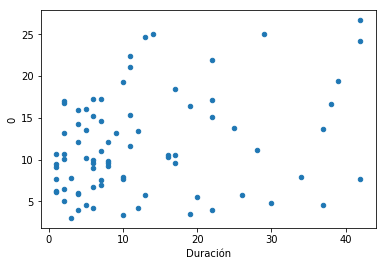

In [401]:
plt.figure(figsize=(15,5))
#plt.plot(res.reset_index(drop=True))
res.reset_index(drop=True).plot.scatter('Duración',0)

Text(0.5,1,'Importancia de variables en la clasificación')

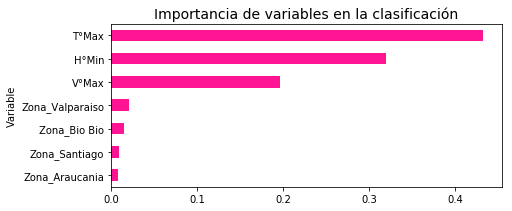

In [333]:
importances = pd.DataFrame(importances).reset_index().groupby('index').mean().reset_index(drop=True)
importances['Variable'] = X_cols.columns
importances.columns = ('Importancia','Variable')
importances.set_index('Variable',inplace=True)
plt.figure(figsize=(7,3))
importances['Importancia'].sort_values().plot(kind='barh',color='deeppink')
plt.title('Importancia de variables en la clasificación',fontsize=14)

Text(0.5,1,'Precision-Recall curve')

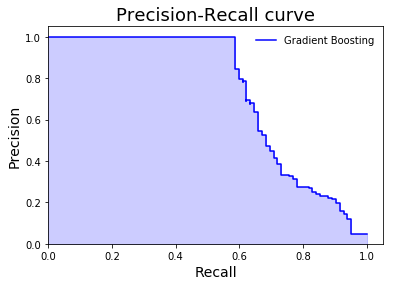

In [381]:
results = pd.DataFrame(df_ml['Incendio']).merge(pd.DataFrame(df_probabilidades[1]), 
                                                    how='inner',left_index=True,right_index=True)
# Precision-Recall Curve
curve = metrics.precision_recall_curve(results.Incendio, results[1])
precision = curve[0]
recall = curve[1]
plt.figure()
plt.step(recall, precision, color='b', alpha=1,
         where='post',label='Gradient Boosting')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.legend(frameon=False)

plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-Recall curve',fontsize=18)

In [403]:
x = 61
print("Confusion Matrix\n", metrics.confusion_matrix(results.Incendio, results[1] > 0.01*x))

Confusion Matrix
 [[1722    0]
 [  34   48]]


## Benchmark

In [370]:
df_ml['Benchmark'] = df_ml.apply(lambda x: 1 if (x['T°Max']>30) & (x['V°Max']>10) 
                                 & (x['H°Min']<40)
                                else 0,axis=1)

In [371]:
df_ml['Benchmark'].value_counts()

0    1580
1     224
Name: Benchmark, dtype: int64

In [372]:
print("Confusion Matrix\n", metrics.confusion_matrix(df_ml.Incendio, df_ml.Benchmark))

Confusion Matrix
 [[1555  167]
 [  25   57]]
